# A. Final Project 3 kelompok 3
---
### Anggota kelompok : <br>
<ol>
<li>Alif Faqiih             PYTN-KS12-024</li>
<li>Syarif Khoirul Al Fian  PYTN-KS12-009</li>
<li>Marcel Afandi           PYTN-KS12-018</li>
<ol>


# B. Library yang digunakan

In [81]:
# For Load Data
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# For Visualizing Data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

# For Prepocessing Data 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.datasets import make_classification

# Ensemble Model 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost

# For Evaluation Model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# C. Data Loading

In [82]:
data = pd.read_csv('data\heart_failure_clinical_records_dataset.csv')

In [83]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [84]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [85]:
data.shape

(299, 13)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# D. Data Cleaning

In [87]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Kita bisa melihat semua data dan tidak ada Missing Value

In [88]:
# Mengubah nama untuk memudahkan penyebutan
data.rename(columns={'age':'Usia',
                     'anaemia':'anemia',
                     'high_blood_pressure':'hipertensi',
                     'sex':'Gender',
                     'smoking':'Perokok',
                     'DEATH_EVENT':'Kematian'
                    }, inplace=True)

In [89]:
for col in data.columns:
    print(col, ': ')
    print(data[col].unique())
    print('\n','#'*60,'\n')

Usia : 
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]

 ############################################################ 

anemia : 
[0 1]

 ############################################################ 

creatinine_phosphokinase : 
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  24

Berdasarkan pengecekan diatas, tidak ada data invalid pada setiap atribut dataset

 # E. Explorating Data

## 1. Data Query

In [90]:
df_EDA = data.copy()
df_EDA

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [91]:
df_EDA.describe()

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time,Kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [92]:
df_EDA["Gender"] = np.where(df_EDA["Gender"] < 1, "Female", "Male")

In [93]:
for col in df_EDA.columns:
    print(format(col),df_EDA[col].unique())

Usia [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anemia [0 1]
creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442 

In [94]:
categoricals=['anemia','diabetes','hipertensi','Perokok', 'Kematian']
change = {0:"No", 1:"Yes"}
for col in categoricals :
    for i in range(299):
        df_EDA.loc[i,col]=change[df_EDA.loc[i,col]]
for col in df_EDA.columns:
    print(format(col),df_EDA[col].unique())

Usia [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anemia ['No' 'Yes']
creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 233

Pada code diatas menampilkan data unique dari atribut categorical

In [95]:
# Melihat statistika deskriptif dari data menggunakan fungsi describe()
df_EDA.astype('category').describe()

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time,Kematian
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,No,582,No,35,No,263358.03,1.0,136,Male,No,250,No
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


## 2. EDA dengan chi square test

Uji chi-square adalah teknik statistik untuk menguji hubungan antara dua variabel kategori. Uji chi-square di bawah ini menunjukkan tidak ada variabel kategori yang memiliki hubungan dengan variabel target.

In [96]:
chi2_contingency(pd.crosstab(index=data['Usia'], columns=data['Kematian']))

(69.14708896211634,
 0.015227406432460549,
 46,
 array([[ 4.75250836,  2.24749164],
        [ 0.67892977,  0.32107023],
        [ 4.75250836,  2.24749164],
        [ 0.67892977,  0.32107023],
        [ 1.35785953,  0.64214047],
        [12.89966555,  6.10033445],
        [ 2.0367893 ,  0.9632107 ],
        [ 0.67892977,  0.32107023],
        [ 1.35785953,  0.64214047],
        [ 2.71571906,  1.28428094],
        [18.33110368,  8.66889632],
        [ 2.71571906,  1.28428094],
        [ 3.39464883,  1.60535117],
        [ 6.78929766,  3.21070234],
        [ 1.35785953,  0.64214047],
        [11.54180602,  5.45819398],
        [ 0.67892977,  0.32107023],
        [ 1.35785953,  0.64214047],
        [ 6.78929766,  3.21070234],
        [ 2.71571906,  1.28428094],
        [22.40468227, 10.59531773],
        [ 1.35785953,  0.64214047],
        [ 2.71571906,  1.28428094],
        [ 3.39464883,  1.60535117],
        [ 5.43143813,  2.56856187],
        [ 2.0367893 ,  0.9632107 ],
        [17.6521

In [97]:
chi2_contingency(pd.crosstab(index=data['anemia'], columns=data['Kematian']))

(1.042175485287005,
 0.3073160508415107,
 1,
 array([[115.4180602,  54.5819398],
        [ 87.5819398,  41.4180602]]))

In [98]:
chi2_contingency(pd.crosstab(index=data['diabetes'], columns=data['Kematian']))

(0.0,
 1.0,
 1,
 array([[118.13377926,  55.86622074],
        [ 84.86622074,  40.13377926]]))

In [99]:
chi2_contingency(pd.crosstab(index=data['hipertensi'], columns=data['Kematian']))

(1.5434607612967581,
 0.21410341199416902,
 1,
 array([[131.71237458,  62.28762542],
        [ 71.28762542,  33.71237458]]))

In [100]:
chi2_contingency(pd.crosstab(index=data['Gender'], columns=data['Kematian']))

(0.0,
 1.0,
 1,
 array([[ 71.28762542,  33.71237458],
        [131.71237458,  62.28762542]]))

In [101]:
chi2_contingency(pd.crosstab(index=data['Perokok'], columns=data['Kematian']))

(0.007331473567119502,
 0.9317652998235507,
 1,
 array([[137.82274247,  65.17725753],
        [ 65.17725753,  30.82274247]]))

### Uji Chi Square Test pada atribut untuk menampilkan hubungan dengan Kematian menggunakan Crosstab

Crosstabs/tabel kontingensi adalah salah satu cara terbaik untuk melihat bagaimana variabel kategori didistribusikan satu sama lain.

In [102]:
cat_features = ["anemia","diabetes","hipertensi","Gender","Perokok","Kematian"]
num_features = pd.Series(data.columns)
num_features = num_features[~num_features.isin(cat_features)]

In [103]:
for i in cat_features:
    ct = pd.crosstab(columns=data[i],index=data["Kematian"])
    stat, p, dof, expected = chi2_contingency(ct) 
    print(f"\n{'-'*len(f'CROSSTAB ANTARA {i.upper()} & KEMATIAN')}")
    print(f"CROSSTAB ANTARA {i.upper()} & Kematian")
    print(f"{'-'*len(f'CROSSTAB ANTARA {i.upper()} & KEMATIAN')}")
    print(ct)
    print(f"\nH0: TIDAK ADA HUBUNGAN ANTARA KEMATIAN & {i.upper()}\nH1: TERDAPAT HUBUNGAN ANTARA KEMATIAN & {i.upper()}")
    print(f"\nP-VALUE: {np.round(p,2)}")


---------------------------------
CROSSTAB ANTARA ANEMIA & Kematian
---------------------------------
anemia      0   1
Kematian         
0         120  83
1          50  46

H0: TIDAK ADA HUBUNGAN ANTARA KEMATIAN & ANEMIA
H1: TERDAPAT HUBUNGAN ANTARA KEMATIAN & ANEMIA

P-VALUE: 0.31

-----------------------------------
CROSSTAB ANTARA DIABETES & Kematian
-----------------------------------
diabetes    0   1
Kematian         
0         118  85
1          56  40

H0: TIDAK ADA HUBUNGAN ANTARA KEMATIAN & DIABETES
H1: TERDAPAT HUBUNGAN ANTARA KEMATIAN & DIABETES

P-VALUE: 1.0

-------------------------------------
CROSSTAB ANTARA HIPERTENSI & Kematian
-------------------------------------
hipertensi    0   1
Kematian           
0           137  66
1            57  39

H0: TIDAK ADA HUBUNGAN ANTARA KEMATIAN & HIPERTENSI
H1: TERDAPAT HUBUNGAN ANTARA KEMATIAN & HIPERTENSI

P-VALUE: 0.21

---------------------------------
CROSSTAB ANTARA GENDER & Kematian
---------------------------------
Ge

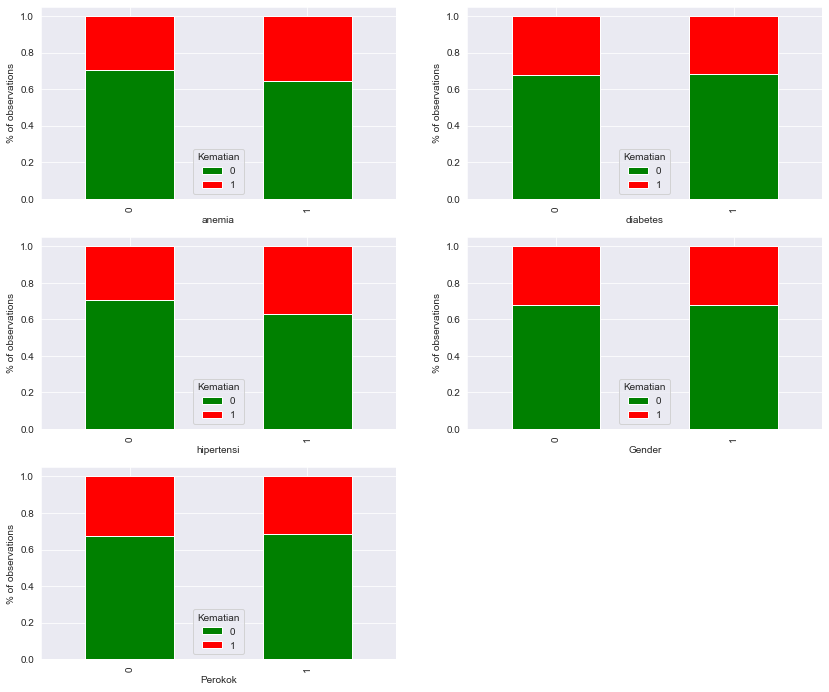

In [104]:
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(14,12))
for n,i in enumerate(cat_features[:-1]):
    ct = pd.crosstab(columns=data[i],index=data["Kematian"],normalize="columns")
    ct.T.plot(kind="bar",stacked=True,color=["green","red"],ax=ax[r,c])
    ax[r,c].set_ylabel("% of observations")
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

Bar plot di atas tidak menunjukkan hubungan yang kuat antara variabel kategori dan variabel target seperti yang terlihat pada uji chi-square

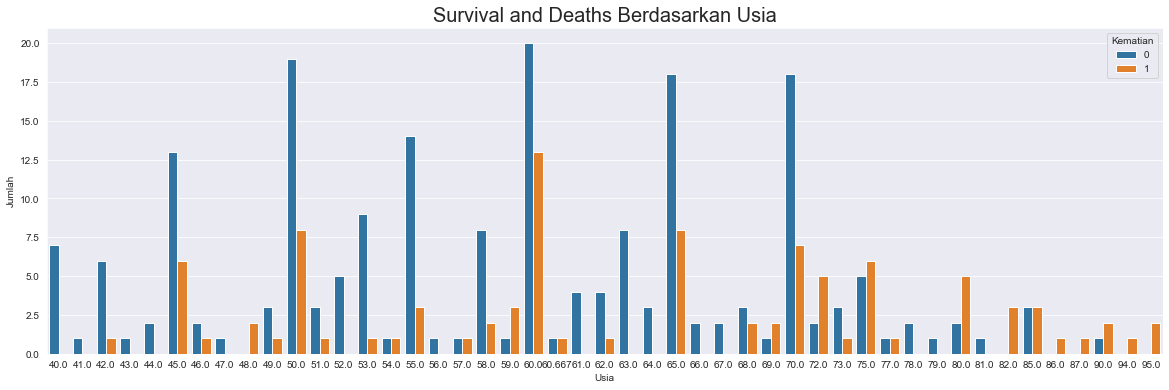

In [105]:
plt.figure(figsize=(20,6))
title = plt.title('Survival and Deaths Berdasarkan Usia', fontsize=20)
title.set_position([0.5, 1.15])
ax = sns.countplot(x="Usia", hue="Kematian", data=data)
ax.set_xlabel('Usia')
ax.set_ylabel('Jumlah')
a = ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

## 3. Visualisasi Data

In [106]:
# Mengatur Label, order dan color
labels=['Female', 'Male']
order=data['Gender'].value_counts().index
color = ('#365c8d', '#1fa187')

<AxesSubplot:title={'center':'Bar Chart'}, xlabel='Gender', ylabel='Total'>

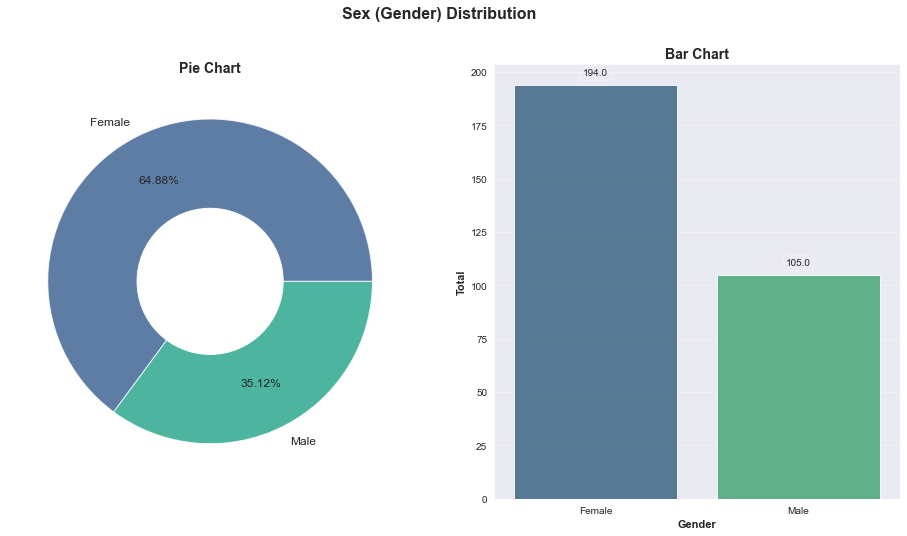

In [107]:
# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
plt.pie(data['Gender'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12}, colors = color)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
ax = sns.countplot(x='Gender', data=data, order=order,
                   alpha=0.85, palette = 'viridis')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
          )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

Dari pie dan bar chart diatas kita dapat melihat gender distribution pada dataset ini.
Didapatkan jumlah Gender Male yaitu 105 atau 35.12%, sedangkan jumlah Gender Wanita yaitu 194 atau 64.88%.
Jika dihitung maka jumlah wanita lebih banyak dari pada pria. 

In [108]:
data.Gender.value_counts()

1    194
0    105
Name: Gender, dtype: int64

In [109]:
# Compare Kematian column with sex column
pd.crosstab(data.Kematian, data.Gender)

Gender,0,1
Kematian,,
0,71,132
1,34,62


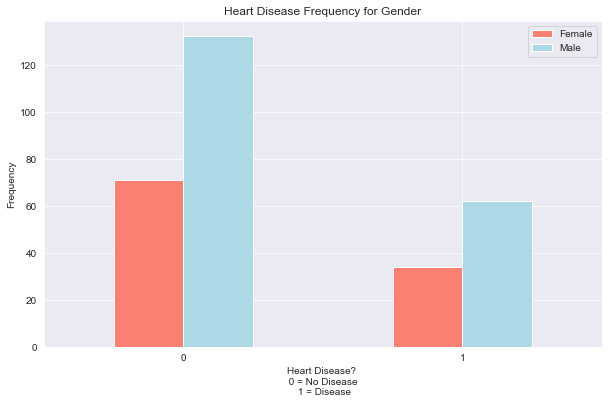

In [110]:
# Create a plot of crosstab
pd.crosstab(data.Kematian, data.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Gender")
plt.xlabel("Heart Disease? \n 0 = No Disease \n 1 = Disease")
plt.xticks(rotation=360)
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.show()

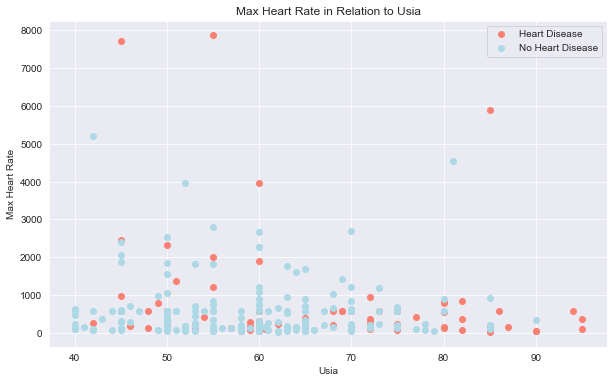

In [111]:
# Create another figure
fig,ax = plt.subplots(figsize=(10, 6))

# Scatter with positive examples
pos_examples = ax.scatter(data.Usia[data.Kematian==1], 
                          data.creatinine_phosphokinase[data.Kematian == 1], 
                          color="salmon", label="Heart Disease")

# Scatter with negative examples
neg_examples = ax.scatter(data.Usia[data.Kematian==0], 
                          data.creatinine_phosphokinase[data.Kematian == 0], 
                          color="lightblue", label="No Heart Disease")

# Get mean line
mean = data["creatinine_phosphokinase"].mean()
mean_line = ax.plot()

# Customize the plot
plt.title("Max Heart Rate in Relation to Usia")
plt.xlabel("Usia")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

In [112]:
numerical= ['Usia', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

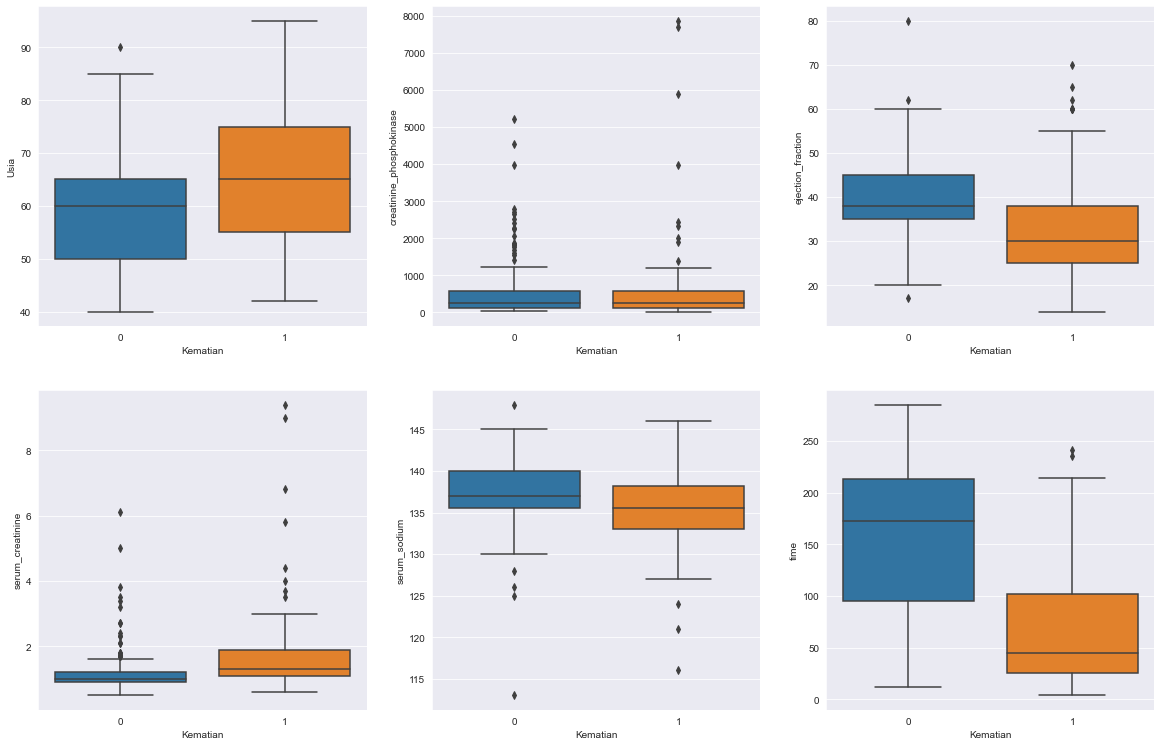

In [113]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    index += 1
    plt.subplot(3, 3, index)
    sns.boxplot(x='Kematian', y=feature, data=data)

In [114]:
# Melihat jumlah penderita anemia
anemia=len(data[data['anemia']==1])
tidak_anemia=len(data[data['anemia']==0])

# Melihat jumlah penderita diabetes
diabetes=len(data[data['diabetes']==1])
tidak_diabetes=len(data[data['diabetes']==0])

# Melihat jumlah penderita hipertensi
hipertensi=len(data[data['hipertensi']==1])
tidak_hipertensi=len(data[data['hipertensi']==0])

# Membuat dataframe dari jumlah penderita diabetes, anemia, dan hipertensi
data_ADH=pd.DataFrame(
    {'keterangan':['anemia','diabetes','hipertensi'],
     'no':[tidak_anemia,tidak_diabetes,tidak_hipertensi],
    'yes':[anemia,diabetes,hipertensi],
    })
data_ADH=data_ADH.set_index('keterangan')
data_ADH

,no,yes
keterangan,,
anemia,170,129
diabetes,174,125
hipertensi,194,105


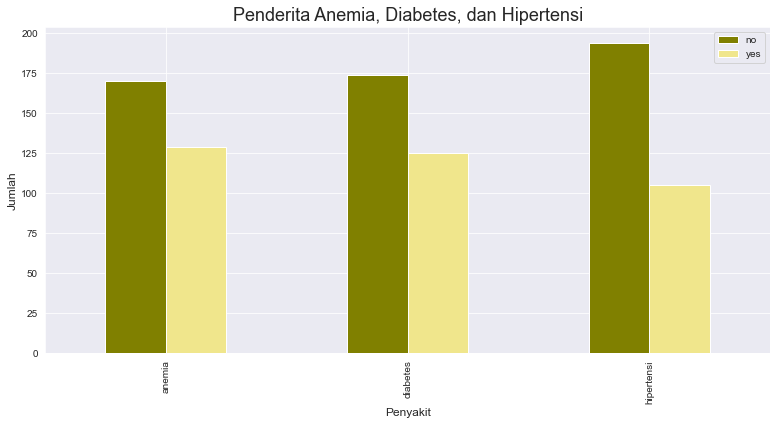

In [115]:
# Membuat visualisasi jumlah penderita anemia, diabetes, hipertensi
data_ADH.plot(kind='bar', figsize=(13,6),
                  color=['olive','khaki'])
plt.title('Penderita Anemia, Diabetes, dan Hipertensi', fontsize=18)
plt.xlabel('Penyakit', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

Dilihat dari plot diketahui bahwa hampir 50% pasien penyakit jantung memiliki riwayat penyakit anemia, diikuti diabetes dan hipertensi.

# F. Preprocessing

## 1. Correlation

Menampilkan korelasi antar atribut numerical

In [116]:
# Storing categorical and numerical features names in different Series
cat_features = ["anemia","diabetes","hipertensi","Gender","Perokok","Kematian"]
num_features = pd.Series(data.columns)
num_features = num_features[~num_features.isin(cat_features)]

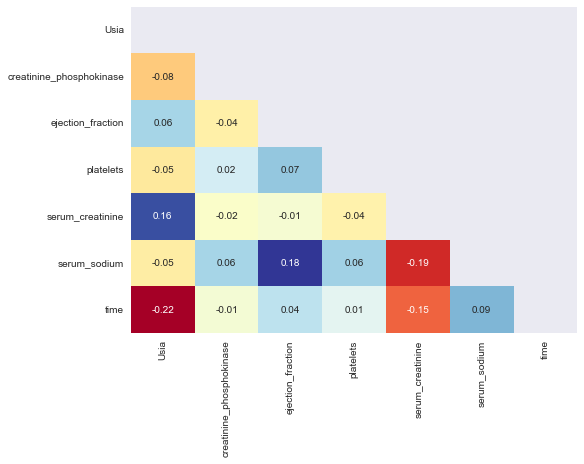

In [117]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(data[num_features].corr(),annot=True,fmt=".2f",mask=np.triu(data[num_features].corr()),cbar=False,cmap='RdYlBu')
plt.show()

In [118]:
data.head()

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Menggunakan semua atribut kecuali kematian pada variable x dengan cara drop dan split data menjadi 60% untuk train dan 40% untuk test

In [119]:
x = data.drop(columns='Kematian')
y = data["Kematian"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.4, random_state=2)

Menggunakan StandarScaler untuk fit_transform 

In [120]:
scaler = StandardScaler()
column = x_train.columns
X_train= scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
scaled_x = pd.DataFrame(x_train, columns=column)
scaled_x.head()

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time
161,45.0,1,130,0,35,0,174000.0,0.8,139,1,1,121
176,69.0,0,1419,0,40,0,105000.0,1.0,135,1,1,147
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94
171,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,146
285,55.0,1,170,1,40,0,336000.0,1.2,135,1,0,250


In [121]:
accuracy_list = []

## 1. Logistic Regression

In [122]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [123]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  86.67%


<Figure size 1440x576 with 0 Axes>

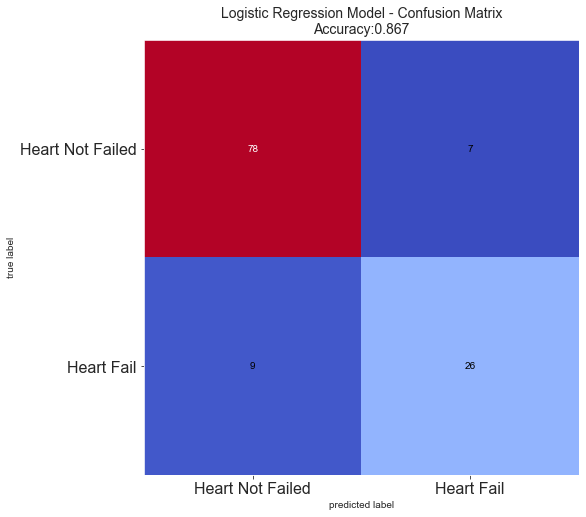

In [124]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap='coolwarm')
plt.title("Logistic Regression Model - Confusion Matrix\nAccuracy:{:.3f}".format(accuracy_score(y_test, log_reg_pred)), fontsize=14)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [125]:
print("Classification Report:\n", classification_report(y_test, log_reg_pred))

print(f'Accuracy Score: {accuracy_score(y_test, log_reg_pred)}')
print(f'Precision Score: {precision_score(y_test,log_reg_pred)}')
print(f'Recall Score: {recall_score(y_test,log_reg_pred)}')
print("F1 Score:",f1_score(y_test,log_reg_pred))
print("roc_auc_score: ", roc_auc_score(y_test, log_reg_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        85
           1       0.79      0.74      0.76        35

    accuracy                           0.87       120
   macro avg       0.84      0.83      0.84       120
weighted avg       0.86      0.87      0.87       120

Accuracy Score: 0.8666666666666667
Precision Score: 0.7878787878787878
Recall Score: 0.7428571428571429
F1 Score: 0.7647058823529412
roc_auc_score:  0.8302521008403362


## 2. Support Vector Machine

In [126]:
# svc

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [127]:
print("Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  70.83%


<Figure size 1440x576 with 0 Axes>

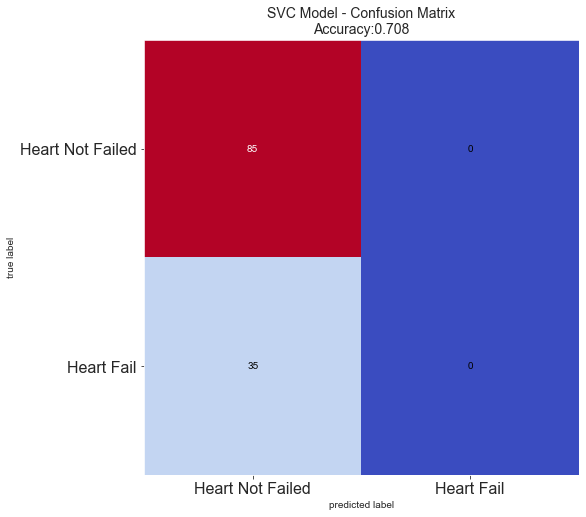

In [128]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap='coolwarm')
plt.title("SVC Model - Confusion Matrix\nAccuracy:{:.3f}".format(accuracy_score(y_test, sv_clf_pred)), fontsize=14)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [129]:
print("Classification Report:\n", classification_report(y_test, sv_clf_pred))

print(f'Accuracy Score: {accuracy_score(y_test, sv_clf_pred)}')
print(f'Precision Score: {precision_score(y_test,sv_clf_pred)}')
print(f'Recall Score: {recall_score(y_test,sv_clf_pred)}')
print("F1 Score:",f1_score(y_test,sv_clf_pred))
print("roc_auc_score: ", roc_auc_score(y_test, sv_clf_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        85
           1       0.00      0.00      0.00        35

    accuracy                           0.71       120
   macro avg       0.35      0.50      0.41       120
weighted avg       0.50      0.71      0.59       120

Accuracy Score: 0.7083333333333334
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
roc_auc_score:  0.5


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## 3. K Neighbors Classifier

In [130]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [131]:
print("Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  65.83%


<Figure size 1440x576 with 0 Axes>

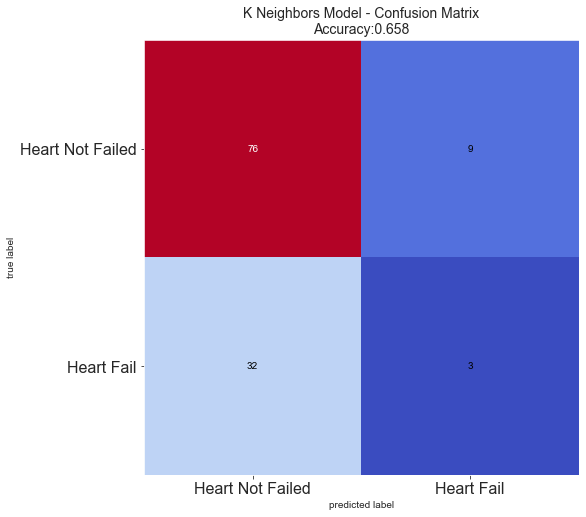

In [132]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap='coolwarm')
plt.title("K Neighbors Model - Confusion Matrix\nAccuracy:{:.3f}".format(accuracy_score(y_test, kn_pred)), fontsize=14)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [133]:
print("Classification Report:\n", classification_report(y_test, kn_pred))

print(f'Accuracy Score: {accuracy_score(y_test, kn_pred)}')
print(f'Precision Score: {precision_score(y_test,kn_pred)}')
print(f'Recall Score: {recall_score(y_test,kn_pred)}')
print("F1 Score:",f1_score(y_test,kn_pred))
print("roc_auc_score: ", roc_auc_score(y_test, kn_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.79        85
           1       0.25      0.09      0.13        35

    accuracy                           0.66       120
   macro avg       0.48      0.49      0.46       120
weighted avg       0.57      0.66      0.60       120

Accuracy Score: 0.6583333333333333
Precision Score: 0.25
Recall Score: 0.08571428571428572
F1 Score: 0.1276595744680851
roc_auc_score:  0.4899159663865546


## 4.Decision Tree Classifier 

In [134]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [135]:
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  81.67%


<Figure size 1440x576 with 0 Axes>

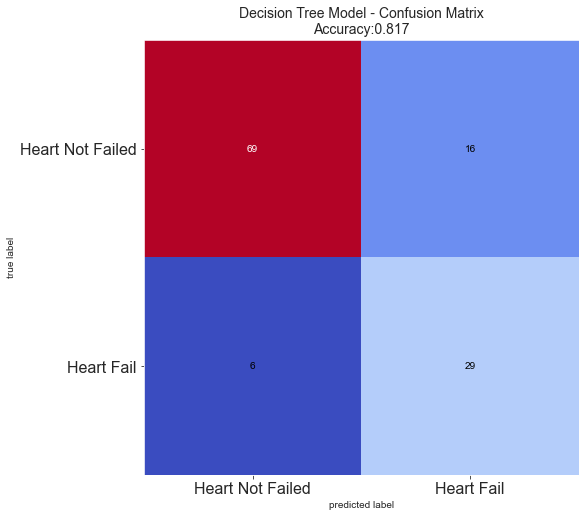

In [136]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap='coolwarm')
plt.title("Decision Tree Model - Confusion Matrix\nAccuracy:{:.3f}".format(accuracy_score(y_test, dt_pred)), fontsize=14)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [137]:
print("Classification Report:\n", classification_report(y_test, dt_pred))

print(f'Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print(f'Precision Score: {precision_score(y_test,dt_pred)}')
print(f'Recall Score: {recall_score(y_test,dt_pred)}')
print("F1 Score:",f1_score(y_test,dt_pred))
print("roc_auc_score: ", roc_auc_score(y_test, dt_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        85
           1       0.64      0.83      0.73        35

    accuracy                           0.82       120
   macro avg       0.78      0.82      0.79       120
weighted avg       0.84      0.82      0.82       120

Accuracy Score: 0.8166666666666667
Precision Score: 0.6444444444444445
Recall Score: 0.8285714285714286
F1 Score: 0.7250000000000001
roc_auc_score:  0.8201680672268908


## 5. RandomForestClassifier

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [140]:
print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  89.17%


<Figure size 1440x576 with 0 Axes>

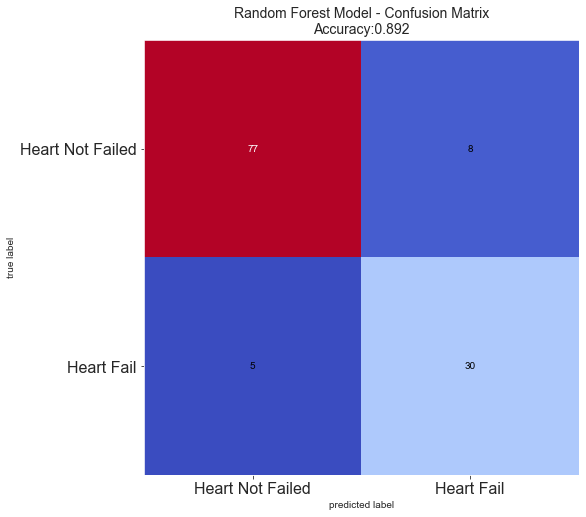

In [141]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap='coolwarm')
plt.title("Random Forest Model - Confusion Matrix\nAccuracy:{:.3f}".format(accuracy_score(y_test, r_pred)), fontsize=14)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [142]:
print("Classification Report:\n", classification_report(y_test, r_pred))

print(f'Accuracy Score: {accuracy_score(y_test, r_pred)}')
print(f'Precision Score: {precision_score(y_test,r_pred)}')
print(f'Recall Score: {recall_score(y_test,r_pred)}')
print("F1 Score:",f1_score(y_test,r_pred))
print("roc_auc_score: ", roc_auc_score(y_test, r_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        85
           1       0.79      0.86      0.82        35

    accuracy                           0.89       120
   macro avg       0.86      0.88      0.87       120
weighted avg       0.90      0.89      0.89       120

Accuracy Score: 0.8916666666666667
Precision Score: 0.7894736842105263
Recall Score: 0.8571428571428571
F1 Score: 0.8219178082191781
roc_auc_score:  0.8815126050420168


In [143]:
# xgbrf classifier

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [144]:
print("Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  85.83%


<Figure size 1440x576 with 0 Axes>

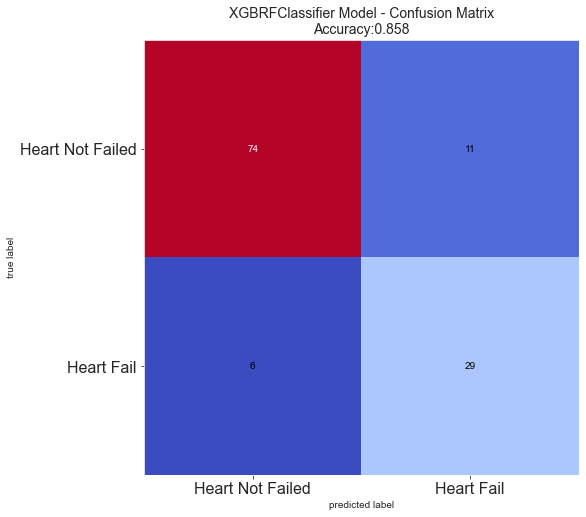

In [145]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap='coolwarm')
plt.title("XGBRFClassifier Model - Confusion Matrix\nAccuracy:{:.3f}".format(accuracy_score(y_test, xgb_pred)), fontsize=14)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [146]:
print("Classification Report:\n", classification_report(y_test, xgb_pred))

print(f'Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print(f'Precision Score: {precision_score(y_test,xgb_pred)}')
print(f'Recall Score: {recall_score(y_test,xgb_pred)}')
print("F1 Score:",f1_score(y_test,xgb_pred))
print("roc_auc_score: ", roc_auc_score(y_test, xgb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        85
           1       0.72      0.83      0.77        35

    accuracy                           0.86       120
   macro avg       0.82      0.85      0.84       120
weighted avg       0.87      0.86      0.86       120

Accuracy Score: 0.8583333333333333
Precision Score: 0.725
Recall Score: 0.8285714285714286
F1 Score: 0.7733333333333333
roc_auc_score:  0.8495798319327732


Naive Bayes

In [147]:
NB = GaussianNB()
model_NB = NB.fit(x_train, y_train)
nb_pred = model_NB.predict(x_test)
nb_acc = accuracy_score(y_test, nb_pred)
accuracy_list.append(100*nb_acc)

In [148]:
print("Accuracy of NBClassifier is : ", "{:.2f}%".format(100* nb_acc))

Accuracy of NBClassifier is :  84.17%


In [149]:
scores = cross_val_score(NB, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.63888889 0.75       0.75       0.77777778 0.68571429]
Average cross-validation score: 0.7204761904761904


<Figure size 1440x576 with 0 Axes>

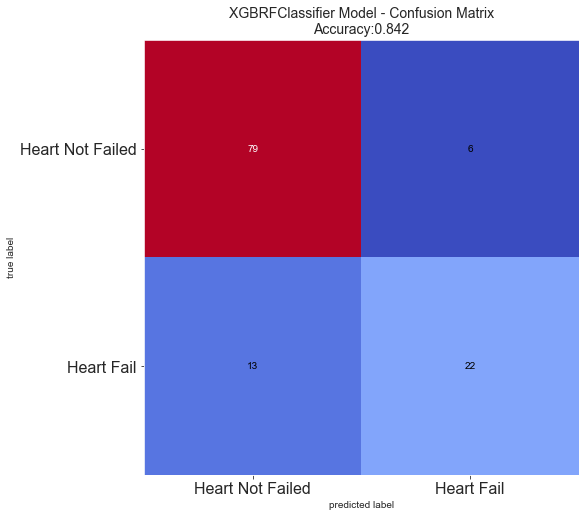

In [150]:
cm = confusion_matrix(y_test, nb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap='coolwarm')
plt.title("XGBRFClassifier Model - Confusion Matrix\nAccuracy:{:.3f}".format(accuracy_score(y_test, nb_pred)), fontsize=14)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [151]:
print("Classification Report:\n", classification_report(y_test, nb_pred))

print(f'Accuracy Score: {accuracy_score(y_test, nb_pred)}')
print(f'Precision Score: {precision_score(y_test,nb_pred)}')
print(f'Recall Score: {recall_score(y_test,nb_pred)}')
print("F1 Score:",f1_score(y_test,nb_pred))
print("roc_auc_score: ", roc_auc_score(y_test, nb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        85
           1       0.79      0.63      0.70        35

    accuracy                           0.84       120
   macro avg       0.82      0.78      0.80       120
weighted avg       0.84      0.84      0.84       120

Accuracy Score: 0.8416666666666667
Precision Score: 0.7857142857142857
Recall Score: 0.6285714285714286
F1 Score: 0.6984126984126985
roc_auc_score:  0.7789915966386555


In [152]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
               'XGBRF', 'NaiveBayes']

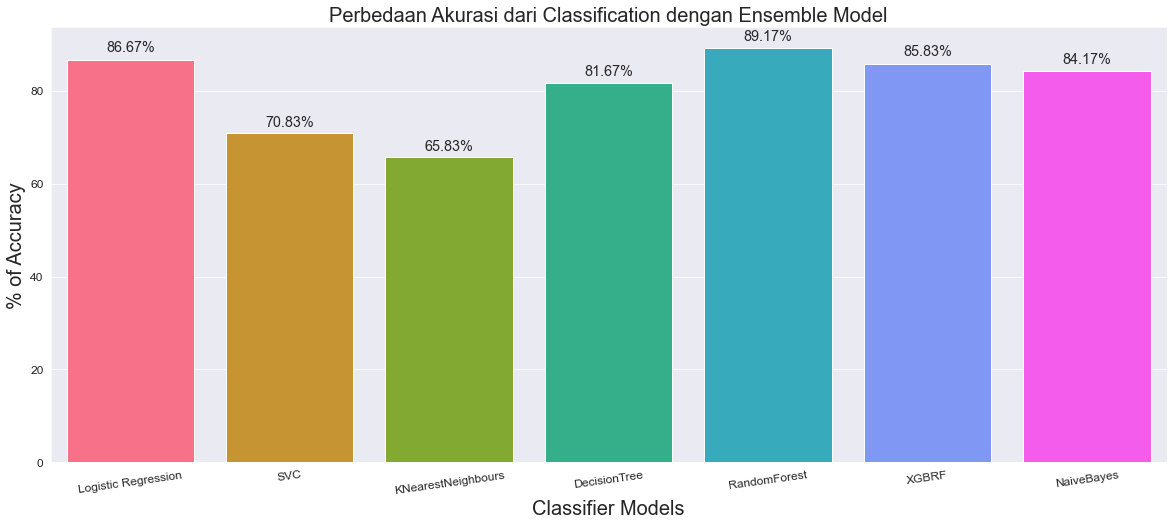

In [153]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Perbedaan Akurasi dari Classification dengan Ensemble Model', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Dari hasil akurasi ke-tujuh model diatas didapatkan model RandomForest memiliki nilai akurasi paling tinggi, sehingga akan dibuatkan model evaluasi untuk membandingkan nilai akurasi mana yang paling baik

## Hyper Parameter Tunning RandomForest menggunakan Grid Search

Bertujuan untuk mengoptimalkan model yang telah dibuat, kekurangan dari Grid Search adalah lambat, menyesuaikan model dengan setiap kemungkinan kombinasi biasanya membutuhkan kapasitas perhitungan yang tinggi dan waktu yang signifikan,

In [154]:
grid = {"n_estimators" : np.arange(0,200,2)}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, grid, cv=3)
rf_random.fit(X_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198])})

In [155]:
print(rf_random.best_params_)
print(rf_random.best_estimator_)

{'n_estimators': 84}
RandomForestClassifier(n_estimators=84)


In [156]:
results_NB = pd.DataFrame(rf_random.cv_results_['params'])
results_NB['test_score'] = rf_random.cv_results_['mean_test_score']
results_NB

,n_estimators,test_score
0,0,NaN
1,2,0.703484
2,4,0.776271
3,6,0.748682
4,8,0.793315
...,...,...
95,190,0.804237
96,192,0.809793
97,194,0.809793
98,196,0.809699


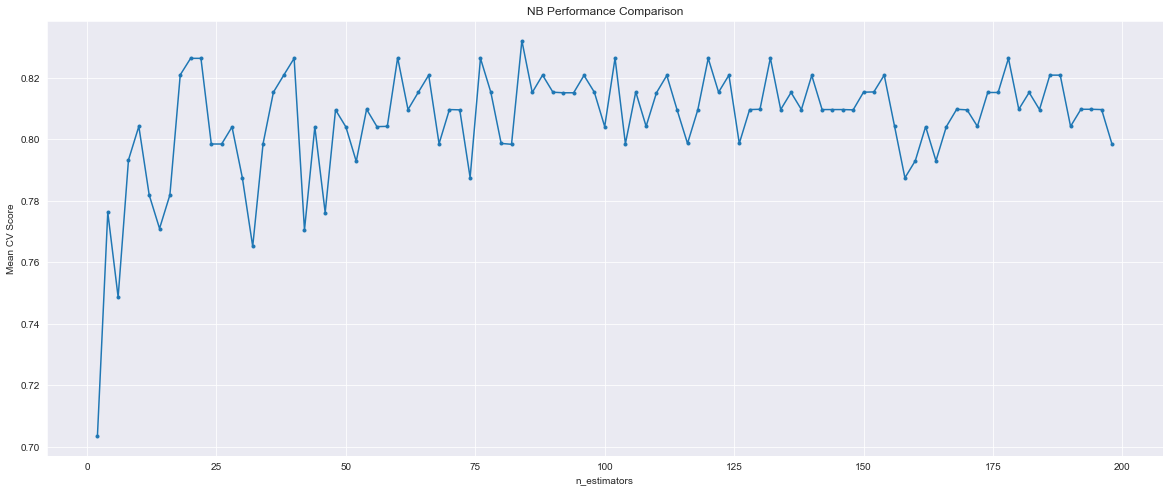

In [157]:
#NB Performance Comparison 
plt.plot(results_NB['n_estimators'], results_NB['test_score'], marker = '.') 
plt.xlabel('n_estimators')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()



Accuracy:  0.9
f1-score: 0.8285714285714286
Precision score:  0.8285714285714286
Recall score:  0.8285714285714286
Roc Auc score:  0.8789915966386556


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        85
           1       0.83      0.83      0.83        35

    accuracy                           0.90       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.90      0.90      0.90       120





Text(0.5, 1.0, 'Confusion Matrix')

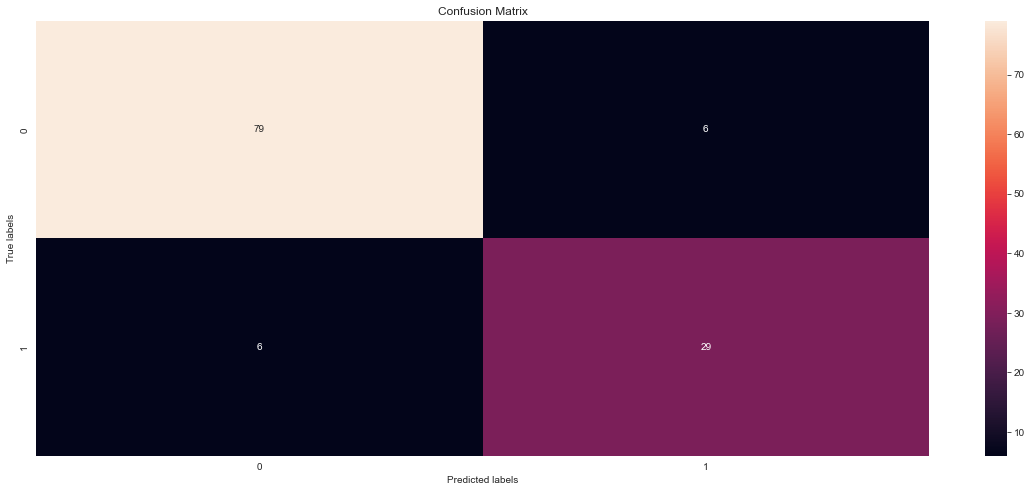

In [158]:
model_RF = rf_random.best_estimator_
model_RF.fit(X_train,y_train)
predictions_RF =  model_RF.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_RF))
print('f1-score:', f1_score(y_test, predictions_RF))
print('Precision score: ', precision_score(y_test,predictions_RF))
print('Recall score: ', recall_score(y_test,predictions_RF))
print('Roc Auc score: ', roc_auc_score(y_test,predictions_RF))
print('\n')
print(classification_report(y_test, predictions_RF))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_RF), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

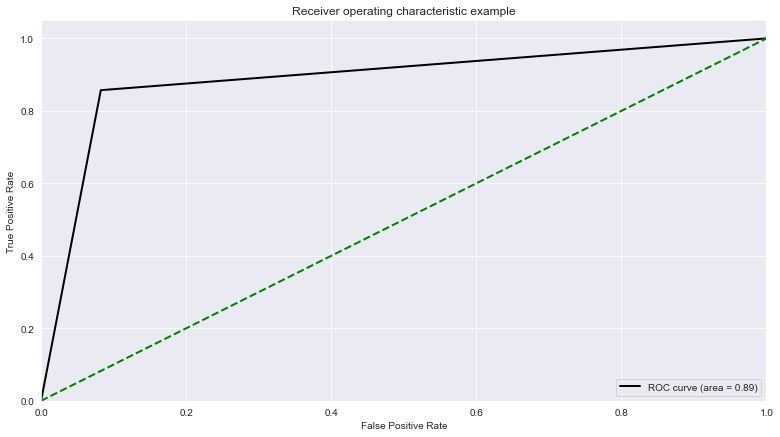

In [159]:
### Fit a sklearn classifier on train dataset and output probabilities
clf = RandomForestClassifier()
model=clf.fit(X_train, y_train)
pred_val = clf.predict(X_test)



### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, pred_val)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure(figsize=(13,7))
lw = 2
plt.plot(fpr, tpr, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [160]:
#Hasil Accuracy RandomForest
print(f'Accuracy Score: {accuracy_score(y_test, r_pred)}')

#Hasil Accuracy RandomForest menggunakan Hyper Parameter Tunning
print('Accuracy Hyper Parameter: ', accuracy_score(y_test,predictions_RF))

Accuracy Score: 0.8916666666666667
Accuracy Hyper Parameter:  0.9


Dari Pengujian akurasi Model RandomForest dan Hyper Parameter Tunning RandomForest menggunakan Grid Search didapatkan bahwa penggunaan Hyper Parameter Grid Search cukup akurat untuk evalusai model